In [226]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import ast
import math

In [228]:
df_exp, lines = load_res("2023-09-11-18:19:52_ev_world_Optim")
#df_exp, lines = load_res("2023-11-21-19:05:57_ev_world_Optim")
#df_exp, lines = load_res("2023-11-21-20:46:18_ev_world_Optim")
#df_exp, lines = load_res("2023-11-22-00:36:13_ev_world_Optim")
#df_exp, lines = load_res("2023-11-22-00:36:22_ev_world_Optim")
#df_exp, lines = load_res("2023-11-22-02:10:42_ev_world_Optim")
#df_exp, lines = load_res("2023-11-22-02:58:12_ev_world_Optim") # Everybody is highest user
#df_exp, lines = load_res("Optim_newC_noE1")
#df_exp, lines = load_res("Optim_newC")
#df_exp, lines = load_res("Optim_50")
#df_exp, lines = load_res("c_Optim")
df_exp, lines = load_res("nc2_Optim")
#df_exp, lines = load_res("Optim_z")

df_exp, lines = load_res("l6_Optim2")
#df_f6_Optim =  pd.read_csv('./../ExpLogs/summ_f6_Optim.csv')

agg_assigned_contracts = []
agg_realized_contracts = []
l_fail_time = []
l_fail_energy1 = []
l_fail_energy2 = []
l_fail_energy_both = []
l_fail_IR = []
i = 0
for row in df_exp.itertuples():
    if not (type(row.realized_type) == float and math.isnan(row.realized_type)):
        str_assigned_type = row.assigned_type.replace(" ", ",")
        str_realized_type = row.realized_type.replace(" ", ",")
        try:
            agg_assigned_contracts.append(ast.literal_eval(str_assigned_type))
            agg_realized_contracts.append(ast.literal_eval(str_realized_type))
        except:
            pass
        l_fail_time.append(row.fail_time)
        l_fail_energy1.append(row.fail_energy1)
        l_fail_energy2.append(row.fail_energy2)
        l_fail_energy_both.append(row.fail_energy_both)
        l_fail_IR.append(row.fail_IR)
exp_assigned_contracts = np.array(agg_assigned_contracts).sum(axis=0)
exp_realized_contracts = np.array(agg_realized_contracts).sum(axis=0)
print(exp_assigned_contracts)
print("-----")
print(exp_realized_contracts)
print("-----")
print("All cars", exp_assigned_contracts.sum())
print("With cont.", exp_realized_contracts.sum())
print("No cont.", exp_assigned_contracts.sum()-exp_realized_contracts.sum())
print("fail time", np.array(l_fail_time).sum())
print("fail_energy1", np.array(l_fail_energy1).sum())
print("fail_energy2", np.array(l_fail_energy2).sum())
print("fail_energy_both", np.array(l_fail_energy_both).sum())
print("fail_IR", np.array(l_fail_IR).sum())
print("Payoff", df_exp["payoff"].sum())
print("Client bill", df_exp["client_bill"].sum())


[[555. 595. 616.]
 [549. 561. 579.]
 [640. 563. 575.]]
-----
[[376. 222.  70.]
 [128. 214.  57.]
 [ 27.  27.  18.]]
-----
All cars 5233.0
With cont. 1139.0
No cont. 4094.0
fail time 1869.0
fail_energy1 668.0
fail_energy2 2667.0
fail_energy_both 3113.0
fail_IR 0.0
Payoff 891.2249883918032
Client bill 9929.3874304


In [231]:
1139 / 5233

0.21765717561628128

/tmp/ipykernel_9452/1097220390.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig1.tight_layout()


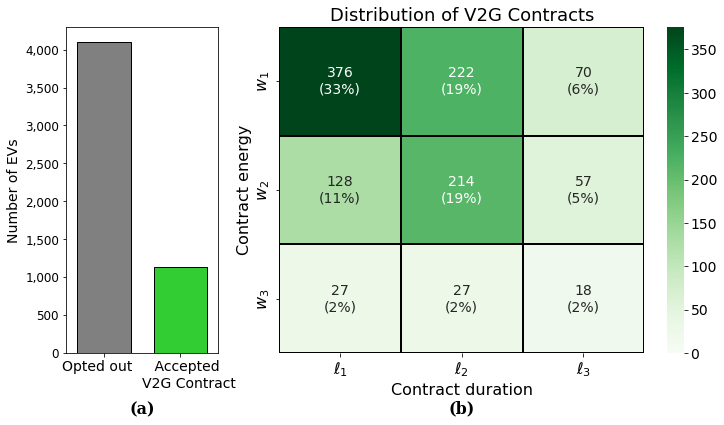

In [230]:
fig1 = plt.figure(figsize = (12,6))
gs = fig1.add_gridspec(1, 2, width_ratios=(1, 3),
                      #left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.1)

ax1 = fig1.add_subplot(gs[0])
ax2 = fig1.add_subplot(gs[1])

fontsize = 14
barwidth = 0.7

sum_rows = exp_realized_contracts.sum(axis=1)

colors = ["red", "orange", "yellow"]

#for i in range(3):
#    color = colors[i]
#    for j in range(3):
#        ax1.barh(2-  i*0*barwidth/3, exp_realized_contracts[i,j], edgecolor = "black", linewidth = 1, color = color, height = barwidth, left = sum_rows[:i].sum() + exp_realized_contracts[i, :j].sum())


ax1.bar(2, exp_realized_contracts.sum(), color = "limegreen", width = barwidth, edgecolor = "black", linewidth = 1)
ax1.bar(1, exp_assigned_contracts.sum()-exp_realized_contracts.sum(), color = "gray", width = barwidth, edgecolor = "black", linewidth = 1)

ax1.set_xlim([0.5, 2.5])
ax1.set_xticks([1,2])
ax1.set_xticklabels(["Opted out   ", "   Accepted\n    V2G Contract"], rotation=0, ha = "center", fontsize = fontsize)

y_ticks = np.arange(0, 4001, 500)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([f"{y:,.0f}" for y in y_ticks], fontsize = fontsize - 2)
ax1.set_ylabel("Number of EVs", fontsize = fontsize)


# Heatmap
htmp = sns.heatmap(exp_realized_contracts, annot=True, fmt=".0f", linewidths=2, linecolor="black", ax = ax2, cmap = "Greens", cbar = True, vmin = 0, annot_kws={"size": fontsize})
cbar = htmp.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize) 

x_ticks = ax2.get_xticks()
ax2.set_xticks(x_ticks)
ax2.set_xticklabels([r"$\ell_1$", r"$\ell_2$", r"$\ell_3$"], fontsize = fontsize + 2)

y_ticks = ax2.get_yticks()
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([r"$w_1$", r"$w_2$", r"$w_3$"], fontsize = fontsize + 2)

ax2.set_xlabel("Contract duration", fontsize = fontsize+2)
ax2.set_ylabel("Contract energy", fontsize = fontsize+2)
ax2.set_title("Distribution of V2G Contracts", fontsize = fontsize + 4)
total = exp_realized_contracts.sum()
for t in ax2.texts: t.set_text(t.get_text() + f"\n({float(t.get_text())/total*100:.0f}%)")


ax1.text(1.5, -800, "(a)", ha="center", fontsize= fontsize+2, family = "serif", fontweight = "bold")
ax2.text(1.5, 3.55, "(b)", ha="center", fontsize= fontsize+2, family = "serif", fontweight = "bold")

fig1.tight_layout()

fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/accepted_contracts.pdf", dpi = 1200, bbox_inches='tight')


In [50]:
G = np.array(
[[0.11749908, 0.18416575, 0.28416575, 0.45083241, 0.60083241],
 [0.14249791, 0.20916458, 0.30916458, 0.47583125, 0.62583125],
 [0.15500012, 0.22166678, 0.32166678, 0.48833345, 0.63833345],
 [0.18832983, 0.2549965 , 0.3549965 , 0.52166317, 0.67166317],
 [0.22166335, 0.28833002, 0.38833002, 0.55499669, 0.70499669],
 [0.25499365, 0.32166031, 0.42166032, 0.58832698, 0.73832698],])

np.multiply(G, exp_realized_contracts).sum()

2906.76215246

In [14]:
ast.literal_eval("[1/1.2,2/2,3/2]")

ValueError: malformed node or string: <_ast.BinOp object at 0x7fedb4540160>